Data mining - Atividade 1 
Heart Failure Prediction Dataset

Available in [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download)

Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]
Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Citation
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

Acknowledgements
Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

In [2]:
#importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [56]:
#Load dataset
ht = pd.read_csv('heart.csv')


In [235]:
#get information
ht.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
Age,40,49,37,48,54,39,45,54,37,48,37
Sex,M,F,M,F,M,M,F,M,M,F,F
ChestPainType,ATA,NAP,ATA,ASY,NAP,NAP,ATA,ATA,ASY,ATA,NAP
RestingBP,140,160,130,138,150,120,130,110,140,120,130
Cholesterol,289,180,283,214,195,339,237,208,207,284,211
FastingBS,0,0,0,0,0,0,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
MaxHR,172,156,98,108,122,170,170,142,130,120,142
ExerciseAngina,N,N,N,Y,N,N,N,N,Y,N,N
Oldpeak,0.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,1.5,0.0,0.0


In [128]:
type(ht)
ht.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

1 - Apresentar a media, moda, variância e desvio padrão para todos os atributos da base;

In [146]:
# Para excluir os dados não numéricos = (numeric_only=true)
mean = (ht.mean(numeric_only=True).T)
mode = (ht.mode(numeric_only=True).T)
var = (ht.var(numeric_only=True).T)
std = (ht.std(numeric_only=True).T)
#Visualizando os dados 
print ('Média:\n',mean,'\n')
print ('Moda:\n',mode,'\n')
print ('Variância:\n',var,'\n')
print ('Desvio_padrão:\n',std,'\n')

#Apresentando todos os dados de "maneira inteligente"
ht.describe().T

Média:
 Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64 

Moda:
                   0
Age            54.0
RestingBP     120.0
Cholesterol     0.0
FastingBS       0.0
MaxHR         150.0
Oldpeak         0.0
HeartDisease    1.0 

Variância:
 Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64 

Desvio_padrão:
 Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64 



,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


2 - Apresentar os valores da mediana e quartil utilizando o gráfico de caixas
(boxplot);

In [205]:
#Apresentando os dados
median = (ht.median(numeric_only=True).T)
print ('Mediana:\n', median,'\n')
ht.quantile([0.25,0.5,0.75]).T

Mediana:
 Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64 



,0.25,0.50,0.75
Age,47.00,54.0,60.0
RestingBP,120.00,130.0,140.0
Cholesterol,173.25,223.0,267.0
FastingBS,0.00,0.0,0.0
MaxHR,120.00,138.0,156.0
Oldpeak,0.00,0.6,1.5
HeartDisease,0.00,1.0,1.0


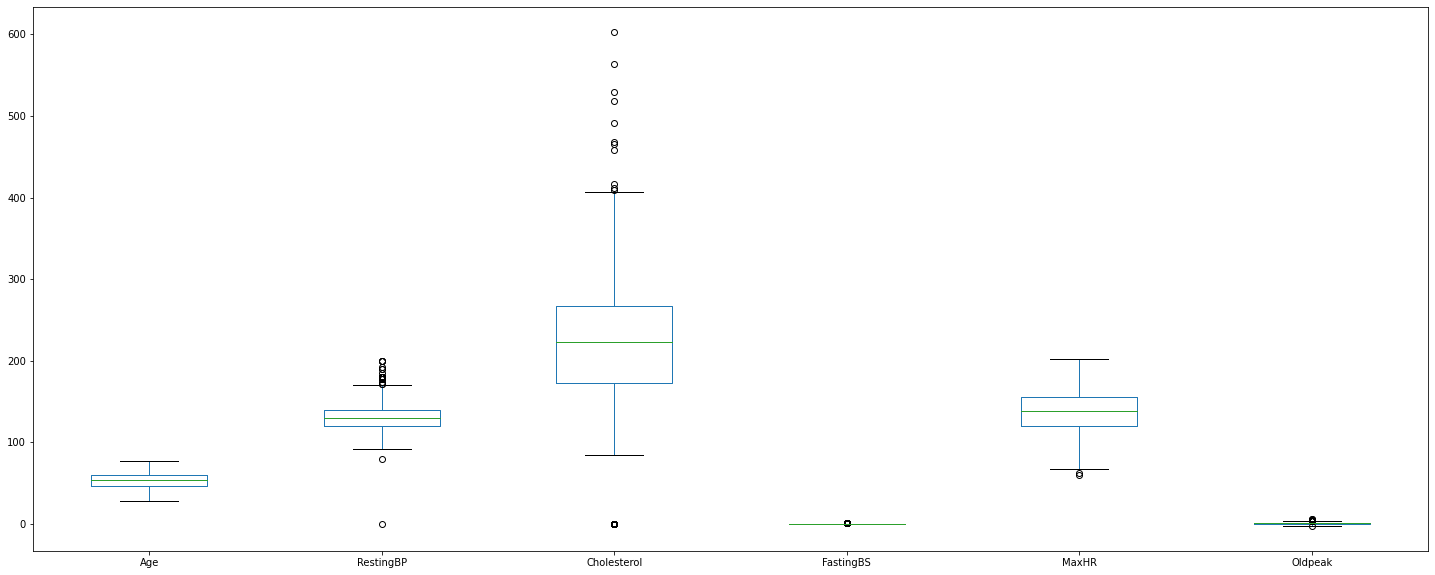

In [254]:
#BoxPlot
boxplot = ht.boxplot(column=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak'], figsize=(25,10), grid=False)

3 - Refazer os exercícios 1 e 2 separando os dados pelas respectivas classes do
problema;


In [238]:
#Média
mean_class = ht.groupby(['HeartDisease']).mean().T
#Moda (Não existe moda entre 1 e 0)
#mode_class = ht.groupby(['HeartDisease']).mode().T
#Variância
var_class = ht.groupby(['HeartDisease']).var().T
#Desvio padrão
std_class = ht.groupby(['HeartDisease']).std().T

print ('Média entre os doentes cardíacos:','\n',mean_class,'\n')
print ('Variância entre os doentes cardíacos:','\n',var_class,'\n')
print ('Desvio padrão entre os doentes cardíacos:','\n',std_class,'\n')


Média entre os doentes cardíacos: 
 HeartDisease           0           1
Age            50.551220   55.899606
RestingBP     130.180488  134.185039
Cholesterol   227.121951  175.940945
FastingBS       0.107317    0.334646
MaxHR         148.151220  127.655512
Oldpeak         0.408049    1.274213 

Variância entre os doentes cardíacos: 
 HeartDisease            0             1
Age             89.206417     76.161499
RestingBP      272.236293    393.176738
Cholesterol   5570.332280  15974.785460
FastingBS        0.096034      0.223097
MaxHR          542.334045    546.948155
Oldpeak          0.489593      1.326809 

Desvio padrão entre os doentes cardíacos: 
 HeartDisease          0           1
Age            9.444915    8.727056
RestingBP     16.499585   19.828685
Cholesterol   74.634659  126.391398
FastingBS      0.309894    0.472332
MaxHR         23.288067   23.386923
Oldpeak        0.699709    1.151872 



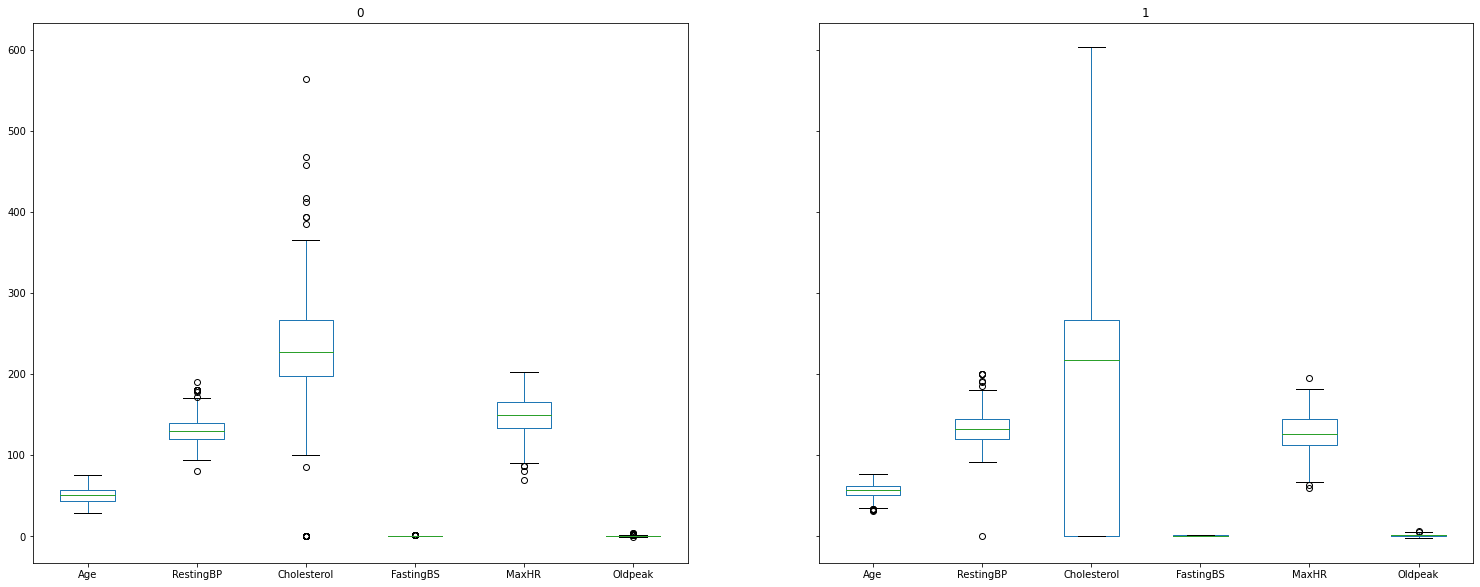

In [266]:
ht_class = ht.groupby('HeartDisease')
box2 = ht_class.boxplot(column=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak'], figsize=(25,10), grid=False)

In [267]:
class_median = (ht_class.median(numeric_only=True).T)
print ('Mediana:\n', class_median,'\n')
ht_class.quantile([0.25,0.5,0.75]).T

Mediana:
 HeartDisease      0      1
Age            51.0   57.0
RestingBP     130.0  132.0
Cholesterol   227.0  217.0
FastingBS       0.0    0.0
MaxHR         150.0  126.0
Oldpeak         0.0    1.2 



HeartDisease       0                     1               
                0.25   0.50    0.75   0.25   0.50    0.75
Age            43.00   51.0   57.00   51.0   57.0   62.00
RestingBP     120.00  130.0  140.00  120.0  132.0  145.00
Cholesterol   197.25  227.0  266.75    0.0  217.0  267.00
FastingBS       0.00    0.0    0.00    0.0    0.0    1.00
MaxHR         134.00  150.0  165.00  112.0  126.0  144.25
Oldpeak         0.00    0.0    0.60    0.0    1.2    2.00

4 - Refazer o item 1 utilizando uma amostragem estratificada de 50% da base
de dados.

In [298]:
#Selecionando amostra aleatória de 50%
ht_halfsample = ht.sample(frac=0.5)
ht_halfsample.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
265,54,M,ATA,160,305,0,Normal,175,N,0.0,Up,0
808,35,M,ASY,126,282,0,LVH,156,Y,0.0,Up,1
752,56,M,ASY,125,249,1,LVH,144,Y,1.2,Flat,1
467,63,F,ATA,132,0,0,Normal,130,N,0.1,Up,0
892,39,F,NAP,138,220,0,Normal,152,N,0.0,Flat,0


In [300]:
mean_hs = (ht_halfsample.mean(numeric_only=True).T)
mode_hs = (ht_halfsample.mode(numeric_only=True).T)
var_hs = (ht_halfsample.var(numeric_only=True).T)
std_hs = (ht_halfsample.std(numeric_only=True).T)
#Visualizando os dados 
print ('Média(50%):\n',mean_hs,'\n')
print ('Moda(50%):\n',mode_hs,'\n')
print ('Variância(50%):\n',var_hs,'\n')
print ('Desvio_padrão(50%):\n',std_hs,'\n')

Média(50%):
 Age              53.050109
RestingBP       132.056645
Cholesterol     196.466231
FastingBS         0.206972
MaxHR           137.904139
Oldpeak           0.839434
HeartDisease      0.527233
dtype: float64 

Moda(50%):
                   0      1
Age            54.0    NaN
RestingBP     120.0  130.0
Cholesterol     0.0    NaN
FastingBS       0.0    NaN
MaxHR         150.0    NaN
Oldpeak         0.0    NaN
HeartDisease    1.0    NaN 

Variância(50%):
 Age                93.309711
RestingBP         357.787177
Cholesterol     11871.035429
FastingBS           0.164493
MaxHR             650.877254
Oldpeak             1.137110
HeartDisease        0.249803
dtype: float64 

Desvio_padrão(50%):
 Age               9.659695
RestingBP        18.915263
Cholesterol     108.954281
FastingBS         0.405577
MaxHR            25.512296
Oldpeak           1.066353
HeartDisease      0.499803
dtype: float64 

